In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np



# Évitez les camemberts à tout prix 

Dans l'exemple ci-dessous, on peut voir qu'il est beaucoup plus facile de comparer des données 

[212 166 215 198 194 157 178 218 168 212]


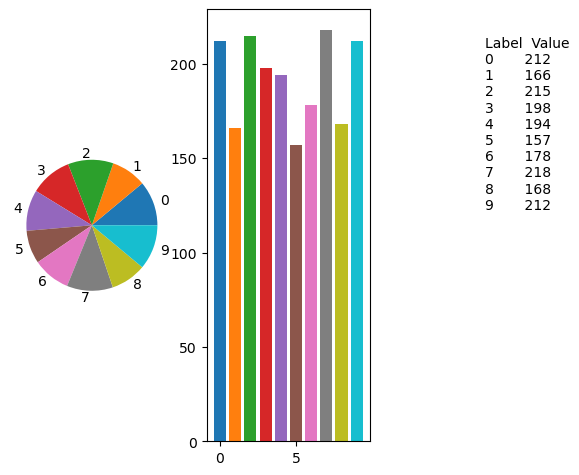

In [83]:
rng = np.random.default_rng()
random_nums = rng.integers(150,250,10)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
#Affichage pour contrôler que l'image n'est pas une image dans le cache
print(random_nums)

#création de la figure
fig = plt.figure()
#ajout d'une grille
gs = fig.add_gridspec(1,3, left=0.08, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.35)
#création des sous-figures : camembert puis barres
ax1 = fig.add_subplot(gs[0,0])
ax1.pie(random_nums, labels=range(10))



ax2 = fig.add_subplot(gs[0,1])
ax2.bar(range(10),random_nums, label=range(10),color = cycle)

ax3 = fig.add_subplot(gs[0,2])
ax3.axis('off')
lines = 'Label  Value\n'
for i,num in enumerate(random_nums):
    lines +='{}       {}\n'.format(i,num)
ax3.text(0.5,0.5,lines)

plt.show()



Entre le tableau, le camembert et les barres, le plus simple pour voir le maximum n'est clairement pas le camembert!

# Comparaison de courbes

S'il faut déterminer où est l'endroit où la différence entre les deux courbes est la plus élevée, cela est très difficile à estimer sur le graphique de gauche alors que c'est trivial sur le graphique de droite.

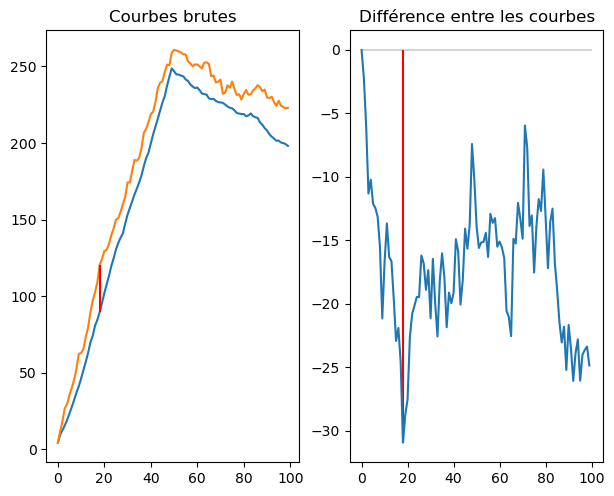

In [66]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure()
#ajout d'une grille
gs = fig.add_gridspec(1,2, left=0.08, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.35)
rng = np.random.default_rng(47)
sampling = 50
values = rng.normal(loc=5,scale=1,size=sampling)
values2 = rng.normal(loc=-1,scale=1,size=sampling)
values3 = rng.normal(loc=5,scale=3,size=sampling)
values4 = rng.normal(loc=-1,scale=3,size=sampling)
xs = np.arange(2*sampling)
serie1 = np.concatenate((values,values2))
serie2 = np.concatenate((values3,values4))                        
serie1 = np.cumsum(serie1)
serie2 = np.cumsum(serie2)
diffs = serie1-serie2

#indice du maximum entre les deux courbes
index = np.argmax(np.absolute(diffs))

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(xs,serie1)
ax1.plot(xs,serie2)
#ajout en rouge de l'endroit avec l'écart le plus grand
ax1.vlines(index,serie1[index],serie2[index],color='red')
ax1.set_title('Courbes brutes')


ax2 = fig.add_subplot(gs[0,1])
ax2.hlines(0,0,2*sampling,color='lightgray')
#ajout en rouge de l'endroit avec l'écart le plus grand
ax2.vlines(index,0,diffs[index],color='red')
ax2.plot(xs,serie1-serie2)
ax2.set_title('Différence entre les courbes')
plt.show()

On peut voir sur l'exemple ci-dessus que notre œil est totalement trompé par la pente moyenne. Ce qui fait que spontanément, nous pensons que l'écart extrême se trouve sur la deuxième partie de la courbe alors que ce n'est pas du tout le cas.

# Inclure le zéro ou non peut largement changer le message

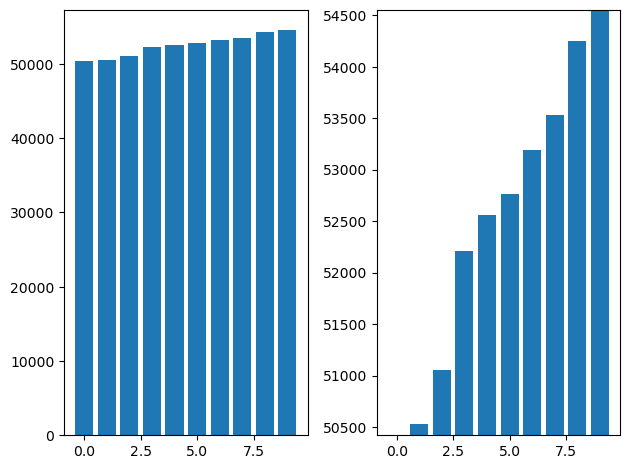

In [80]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure()
#ajout d'une grille
gs = fig.add_gridspec(1,2)
rng = np.random.default_rng()
sampling = 10
values = rng.integers(50000,55000 ,size=sampling)
ax1 = fig.add_subplot(gs[0,0])
ax1.bar(range(sampling),np.sort(values))
ax2 = fig.add_subplot(gs[0,1])
ax2.bar(range(sampling),np.sort(values))
ax2.set_ylim(np.min(values),np.max(values))
plt.tight_layout()
plt.show()


Le graphique de gauche montre une certaine homogénéité des données malgré des variations de l'ordre de la dizaine de pourcent. Le graphique de droite présenté seul pourrait laisser croire au contraire qu'il y a des disparités énormes.